## RELATÓRIO DE ANALISE VIII

In [1]:
#Identificando e removendo outliers

In [2]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rc('figure', figsize = (10, 4))

In [3]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep =';')

<Axes: >

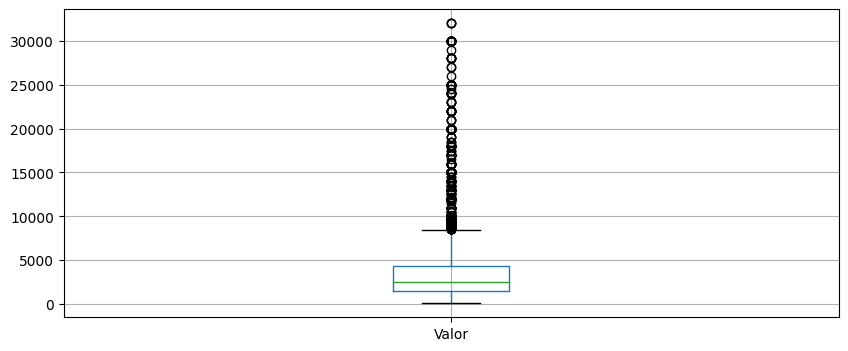

In [4]:
dados.boxplot(['Valor'])

In [5]:
dados[dados['Valor'] >= 5000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
11,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento
15,Apartamento,Copacabana,3,0,0,180,5500.0,1780.0,420.0,30.56,Apartamento
20,Apartamento,Copacabana,4,1,0,244,5000.0,2500.0,4100.0,20.49,Apartamento
31,Apartamento,Barra da Tijuca,4,3,3,153,6500.0,2300.0,434.0,42.48,Apartamento
35,Apartamento,Botafogo,3,1,1,108,5950.0,1405.0,289.0,55.09,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
18779,Casa de Condomínio,Barra da Tijuca,4,3,2,250,7500.0,1300.0,680.0,30.00,Apartamento
18780,Casa de Condomínio,Barra da Tijuca,4,3,4,460,12000.0,1000.0,1200.0,26.09,Apartamento
18781,Casa de Condomínio,Barra da Tijuca,5,2,5,554,20000.0,1892.0,1743.0,36.10,Apartamento
18783,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,0.0,20.00,Apartamento


In [6]:
valor = dados['Valor']

In [7]:
q1 = valor.quantile(.25)
q1

1500.0

In [8]:
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
IIQ = q3 - q1 
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ 

In [9]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior) 
dados_new = dados[selecao]

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

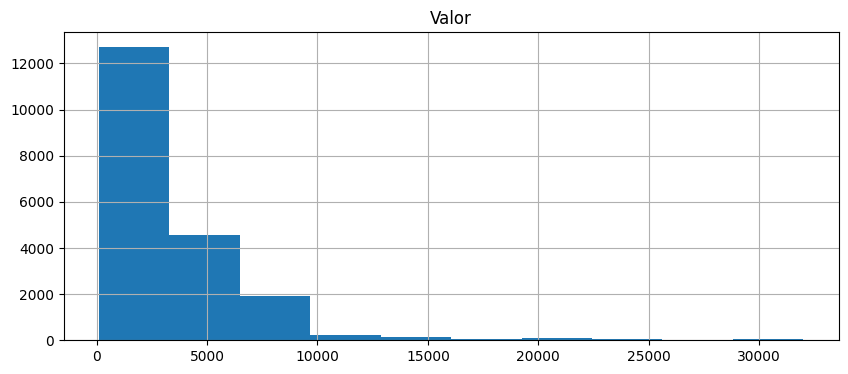

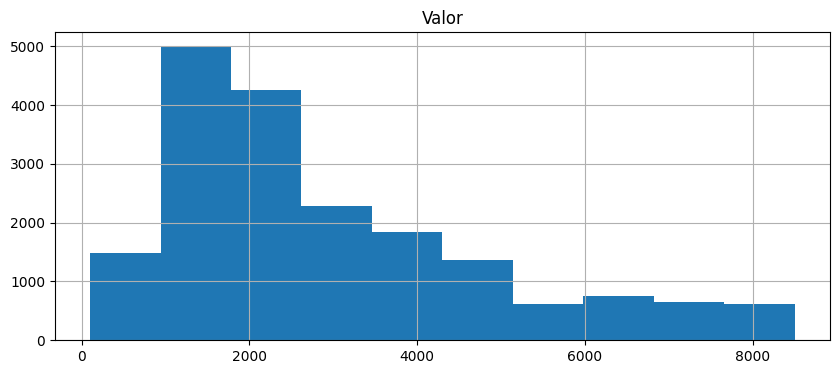

In [10]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

# POR GRUPOS

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

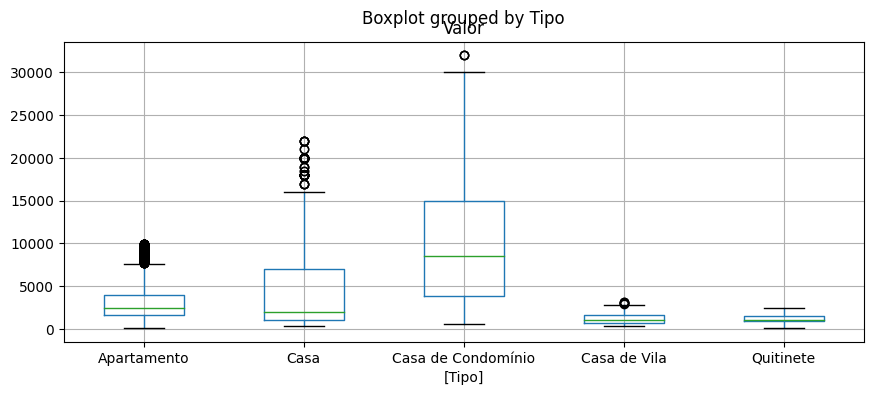

In [11]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [12]:
grupo_tipo = dados.groupby('Tipo')
grupo_tipo

In [13]:
grupo_tipo = dados.groupby('Tipo')['Valor']
grupo_tipo

In [14]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Casa': [16923, 16924, 16925, 16926, 16927, 16928, 16929, 16930, 16931, 16932, 16933, 16934, 16935, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16946, 16947, 16948, 16949, 16950, 16951, 16952, 16953, 16954, 16955, 16956, 16957, 16958, 16959, 16960, 16961, 16962, 16963, 16964, 16965, 16966, 16967, 16968, 16969, 16970, 16971, 16972, 16973, 16974, 16975, 16976, 16977, 16978, 16979, 16980, 16981, 16982, 16983, 16984, 16985, 16986, 16987, 16988, 16989, 16990, 16991, 16992, 16993, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17001, 17002, 17003, 17004, 1700

In [15]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Q1 


Tipo
Apartamento           1600.0
Casa                  1000.0
Casa de Condomínio    3900.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [16]:
Q3

Tipo
Apartamento            4000.0
Casa                   7000.0
Casa de Condomínio    15000.0
Casa de Vila           1600.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [17]:
IIQ

Tipo
Apartamento            2400.0
Casa                   6000.0
Casa de Condomínio    11100.0
Casa de Vila            850.0
Quitinete               600.0
Name: Valor, dtype: float64

In [18]:
limite_inferior

Tipo
Apartamento           -2000.0
Casa                  -8000.0
Casa de Condomínio   -12750.0
Casa de Vila           -525.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [19]:
limite_superior

Tipo
Apartamento            7600.0
Casa                  16000.0
Casa de Condomínio    31650.0
Casa de Vila           2875.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [20]:
limite_superior['Apartamento']

7600.0

In [21]:
for tipo in grupo_tipo.groups.keys():
    print(tipo

SyntaxError: incomplete input (589327406.py, line 2)

In [ ]:
#fazendo uma seleção, em um caso que temos mais de um tipo de variável
for tipo in grupo_tipo.groups.keys(): 
    eh_tipo = dados['Tipo'] == tipo 
    dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo]) 
    selecao = eh_tipo & dentro_limite 
    dados[selecao]

In [ ]:
#criando um novo dataFrame e concatenando as duas tabelas com o método concat 
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [ ]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)